# Analysing the most prevalent theft crimes in the UK

The aim of this program is to analyse the most prevalent theft crime type in the UK in 2015.

- We will see rates of all theft crimes across police regions across the UK for 2014 and 2015.  2014 crime rates read in as a comparison. 

- I will then identify the policing regions that the highest rate and which lie outside the standard deviation for 2015 only.  I will refer to these as the outliers.  

- I have then hard-coded populations for these regions.  I will finally identify the regions which have the highest crime rate per population out of the outlier regions.  

In [1]:
# importing relevant libraries used in this program.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<br>

# Setting plot parameters

In [2]:
# Setting plot styles to fivethirtyeight.
plt.style.use('fivethirtyeight')

# Setting plot figure sizes. 
plt.rcParams["figure.figsize"] = (12,8)

# Setting size of titles on the plot figures.
plt.rcParams["figure.titlesize"] = 22

# Setting size of titles on the plot axis, (where object orientated method was used to plot). 
plt.rcParams["axes.titlesize"] = 22

<br>

# Importing dataset

In [3]:
# variable for dataset path
path = "full dataset.xlsx"

# vairable for the columns I wish to import - theft offences. 
cols = "A,B,CF:CT"

In [4]:
# Reading in the dataset as a dataframe.  Skipping 7 rows of preamble. 
df = pd.read_excel(path, skiprows = 7, usecols = cols,header=1)

<br>

# Cleaning up dataset

In [5]:
# Removing white space from column headings
df.columns = df.columns.str.replace('    ','')
df.columns = df.columns.str.replace('   ',' ')

In [6]:
# Dropping columns that are out of scope for this project. I only wish to analyse 2014 and 2015 crimes. 
df = df.drop(range(0,519))
df = df.drop(range(564, 566))

In [7]:
# Merging duplicate columns. 

# Some empty rows have "..", replacing this with empty string. 
df = df.replace('\..','', regex=True)

# Merging the below column.
df['Burglary in a dwelling'] = df['Burglary in a dwelling'].astype(str) + df['Burglary in a dwelling.1'].astype(str)

# Dropping the duplicate column.
df = df.drop(['Burglary in a dwelling.1'], axis=1)

# Converting remaining column to int (from string). 
df['Burglary in a dwelling'] = pd.to_numeric(df['Burglary in a dwelling'])


# Repeating above steps for further duplicate column. 
df['Burglary in a building other than a dwelling'] = df['Burglary in a building other than a dwelling'].astype(str) + df['Burglary in a building  other than a dwelling'].astype(str)
df = df.drop(['Burglary in a building  other than a dwelling'], axis=1)
df['Burglary in a building other than a dwelling'] = pd.to_numeric(df['Burglary in a building other than a dwelling'])

In [8]:
# deleting rows with "Force" value "total". 
df = df[df.Force != "Total"]

<br>

# Analysing Offences

Getting a snap shot of the type and volume of offences. Discuss crime categories.......


<br>

### Plotting the crimes categories in pie plot. 

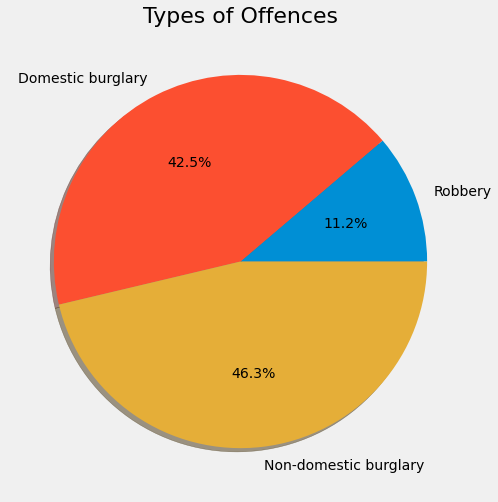

In [9]:
# Getting the sum of the crime categories across the policing region. 
groups = [df["TOTAL ROBBERY"].sum(), df["Domestic burglary"].sum(), df["Non-domestic burglary"].sum()]

# Labels for the theft crime categories. 
labels = ["Robbery","Domestic burglary","Non-domestic burglary"]

# Ploting a pie chart of the crime categories. 
plt.pie(groups, labels = labels, autopct='%1.1f%%', textprops={'fontsize': 14}, shadow = True)

# Setting title of the pie plot. 
plt.title("Types of Offences")

# Showing the plot. 
plt.show()

In [10]:
# Dropping the crime categories totals as we do not have to analyse these further. 
offences = df.drop(columns=["TOTAL ROBBERY", "Domestic burglary", "Non-domestic burglary"], inplace = False)

# Printing the updated dataframe.
offences

,Year,Force,Robbery of business property,Robbery of personal property,Burglary in a dwelling,Attempted burglary in a dwelling,Distraction burglary in a dwelling,Attempted distraction burglary in a dwelling,Aggravated burglary in a dwelling,Burglary in a building other than a dwelling,Attempted burglary in a building other than a dwelling,Aggravated burglary in a building other than a dwelling
519,2013/14,Avon and Somerset,67.0,664.0,3277,685,66,12,40.0,5424,710,4.0
520,2013/14,Bedfordshire,50.0,586.0,2260,491,32,1,12.0,1992,365,0.0
521,2013/14,British Transport Police,0.0,416.0,0,0,0,0,0.0,401,41,1.0
522,2013/14,Cambridgeshire,35.0,345.0,2083,288,23,1,16.0,2663,305,0.0
523,2013/14,Cheshire,80.0,232.0,2340,412,22,1,56.0,3689,517,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
605,2014/15,Warwickshire,42.0,190.0,1068,192,20,2,19.0,1954,269,2.0
606,2014/15,West Mercia,58.0,345.0,2223,444,37,1,5.0,3894,532,0.0
607,2014/15,West Midlands,717.0,4171.0,9144,2026,220,5,30.0,9567,1462,2.0
608,2014/15,West Yorkshire,283.0,1583.0,8443,2603,169,21,60.0,10972,2093,3.0


In [11]:
# Grouping the dataframe by the year as saving as totals variable. 
totals = offences.groupby(['Year']).sum()

# printing totals. 
totals

,Robbery of business property,Robbery of personal property,Burglary in a dwelling,Attempted burglary in a dwelling,Distraction burglary in a dwelling,Attempted distraction burglary in a dwelling,Aggravated burglary in a dwelling,Burglary in a building other than a dwelling,Attempted burglary in a building other than a dwelling,Aggravated burglary in a building other than a dwelling
Year,,,,,,,,,,
2013/14,5789.0,52039.0,171416,36361,2847,189,1175.0,200570,30549,105.0
2014/15,5754.0,44482.0,157305,35128,3062,239,1287.0,185548,28720,165.0


<br>

### Plotting the totals for each crime in the UK in 2015.

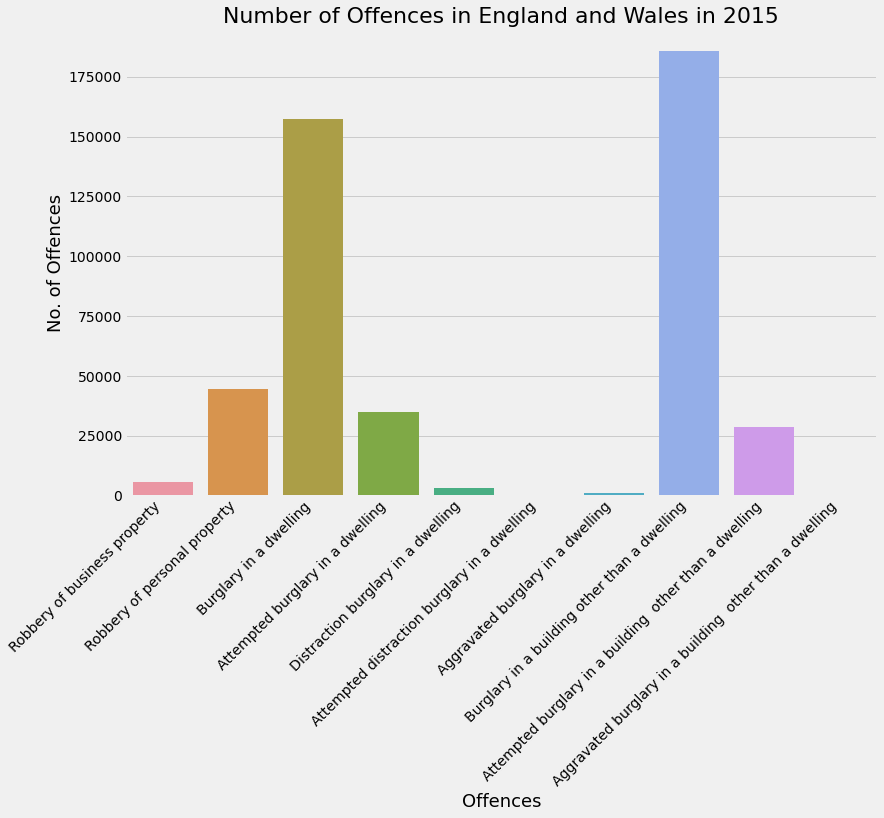

In [12]:
# Getting 2015 data from totals series.
data = totals.iloc[1]

# Plotting on a bar plot.
ax = sns.barplot(y= data, x= data.index.values)

# Setting x label.
plt.xlabel('Offences', fontsize=18)

# Setting y label.
plt.ylabel('No. of Offences', fontsize=18)

# Ratating the x ticks 45 degrees and to the center of each bar. 
plt.setp(ax.get_xticklabels(), rotation=45, ha = "right")

# Setting title of the plot. 
plt.title("Number of Offences in England and Wales in 2015")

# Showing the plot. 
plt.show()

In [13]:
# Getting a data series of the totals for 2015 only. 
top_crimes = totals.loc["2014/15"]

# Getting the name of the most prevalent crime.  
top_crime = top_crimes.idxmax(axis=0)

In [14]:
# Printing the name of the top crime. 
top_crime

'Burglary in a building other than a dwelling'

In [15]:
# Getting the average for the most frequent crime in 2015.
average = df.groupby("Year")[top_crime].mean().loc["2014/15"]

# Getting lenght of the x axis. 
lenght = len(df["Force"].unique())

In [16]:
# Getting y axis tick range, through numpy range 0 to max, increased by 1000 each time. 
yticks = np.arange(0, df[top_crime].max(),1000, dtype=int)

<br>

### Plotting 2014 and 2015 top_crime by Force. 

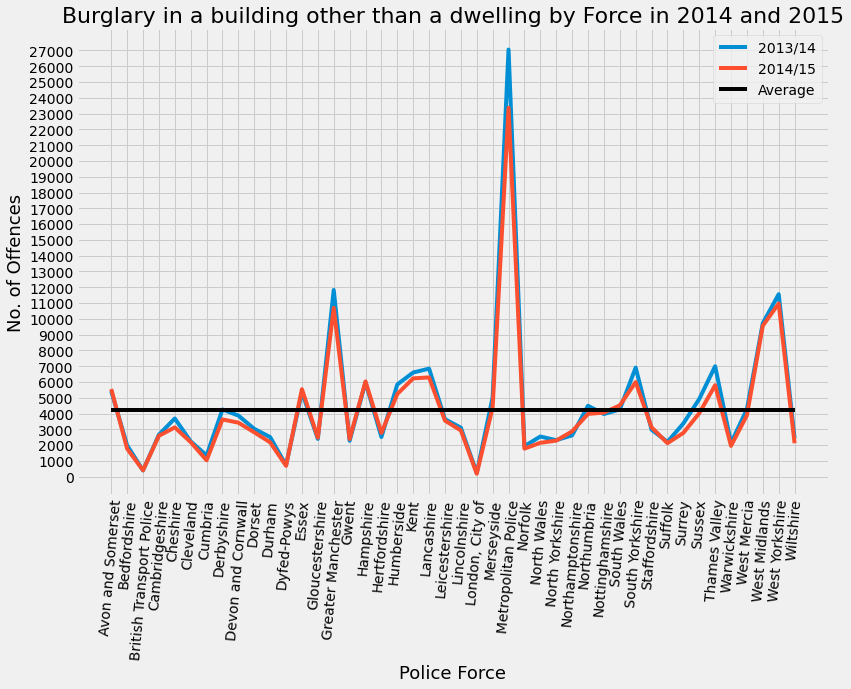

In [17]:
# Plotting the top theft crime in 2015 by the force on a line plot. 
ax = sns.lineplot(x="Force", y = top_crime, data = offences, hue="Year")

# Rotating the x ticks to 85 degrees. 
plt.setp(ax.get_xticklabels(), rotation=85)

# Setting y ticks from vairable at input 16.
plt.yticks(yticks)

# Plotting the average number of offences as a black line on the plot. To be used as a benchmark. 
sns.lineplot(x= range(0,lenght), y = average, color = "black", label = "Average")

# Setting the title of the plot from top_crime variable. 
plt.title('{} by Force in 2014 and 2015'.format(top_crime))

# Setting x and y labels. 
plt.xlabel('Police Force', fontsize=18)
plt.ylabel('No. of Offences', fontsize=18)

# Showing plot. 
plt.show()

In [18]:
# Creating a dataframe for 2015 top offence only by the region. 
offences2015 = offences[offences["Year"] == "2014/15"].groupby("Force")[[top_crime]].sum()

In [19]:
# Showing a statistical summary of 2015 crimes. 
offences2015.describe()

,Burglary in a building other than a dwelling
count,44.000000
mean,4217.000000
std,3806.329985
min,190.000000
25%,2187.500000
50%,3128.500000
75%,5317.000000
max,23369.000000


### Plotting a boxplot of the 2015 crimes across the police regions.

This will also use to understand the spread and identify if outliers exist.  Below we can see a number of outliers. 

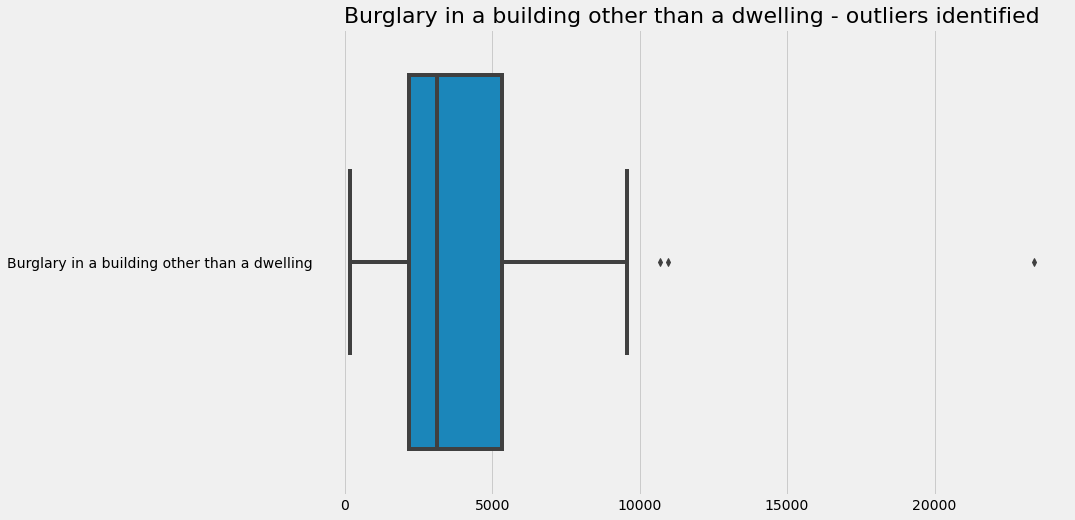

In [20]:
# Plotting data on seaborn boxplot. 
sns.boxplot(data = offences2015, orient = "h")

# Plotting title. 
plt.title('{} - outliers identified'.format(top_crime))

# Showing plot. 
plt.show()

<br>

### Getting the names of the outlier regions for the top crime

In [21]:
# The mean + the standard deviation will give us the upper bound.  
stdmax = offences2015.mean() + offences2015.std()

# Outliers are those regions that have offences greater than the upper bound standard deviation i.e. stdmax variable. 
# This returns boolean values for each region, either true (greater than stdmax) or false (less than or equal to the stdmax). 
outliers = offences2015[top_crime] > stdmax[0]

# Returning the values of the regions that are true (greater than stdmax) in a dataframe. 
outliers = offences2015[outliers]
outliers

,Burglary in a building other than a dwelling
Force,
Greater Manchester,10694
Metropolitan Police,23369
West Midlands,9567
West Yorkshire,10972


<br>

### Plotting a histogram for the top crime

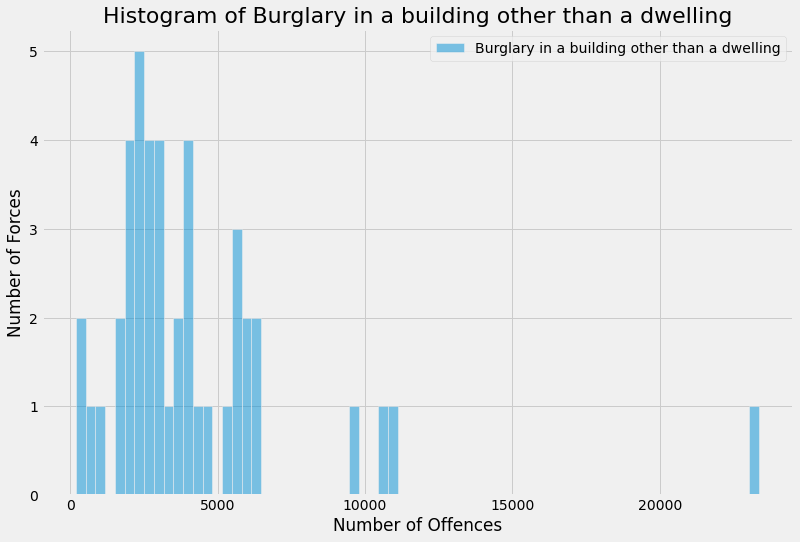

In [22]:
# Seaborn histogram plot for top crime offence with 70 bins so minimum value on histogram is 1. 
sns.histplot(data=offences2015, bins = 70)

# Setting title of the plot.
plt.title("Histogram of {}".format(top_crime))

# Setting x and y labels. 
plt.xlabel("Number of Offences")
plt.ylabel("Number of Forces")

# Showing the plot. 
plt.show()

<br>

### Hardcoding the populations

Populations taken from the relevant councils webpage. 

<br>

Weight is none as this will be appended once determined.   Weight will be crime per person in the population. 

In [23]:
pop = {outliers.index[0]:{"pop": 2822000, "weight":None }, outliers.index[1]: {"pop":8950000,"weight": None}, outliers.index[2]:{"pop": 2928000, "weight":None }, outliers.index[3]:{"pop": 2325000, "weight": None}}

In [24]:
# Determining crime weight for each outlier region. 

# Appending the weight for each outlier region.   Crime / population 
pop["Greater Manchester"]["weight"] = outliers.loc["Greater Manchester"][0]/pop["Greater Manchester"]["pop"]
pop["Metropolitan Police"]["weight"] = outliers.loc["Metropolitan Police"][0]/pop["Metropolitan Police"]["pop"]
pop["West Midlands"]["weight"] = outliers.loc["West Midlands"][0]/pop["West Midlands"]["pop"]
pop["West Yorkshire"]["weight"] = outliers.loc["West Yorkshire"][0]/pop["West Yorkshire"]["pop"]

In [25]:
# Creating an array for the population.  I will index from the dict object pop. 
population = []

y = iter(pop.values())

while (x := next(y, None)) is not None:
    population.append(list(x.values())[0])

# Joinging population as a new column on the outliers dataframe. 
outliers["population"] = population

C:\Users\RADAL\AppData\Local\Temp\ipykernel_21320\1282291009.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers["population"] = population


In [26]:
# Creating an array for the crime weight.  I will index from the dict object pop. 
y = iter(pop.values())

weight = []

while (x := next(y, None)) is not None:
    weight.append(list(x.values())[1])
    
outliers["weight"] = weight

# Joinging weight as a new column on the outliers dataframe. 
outliers

C:\Users\RADAL\AppData\Local\Temp\ipykernel_21320\111128612.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers["weight"] = weight


,Burglary in a building other than a dwelling,population,weight
Force,,,
Greater Manchester,10694,2822000,0.003790
Metropolitan Police,23369,8950000,0.002611
West Midlands,9567,2928000,0.003267
West Yorkshire,10972,2325000,0.004719


<br>

### A pie plot for the populations on the outlier regions.
This will let us visualise the populations weighting for these regions.  We can see that London "Metropolitican Police" accounts for more than half of the population from the 4 outlier regions.  West Yorkshire accounts for the lowest population.  

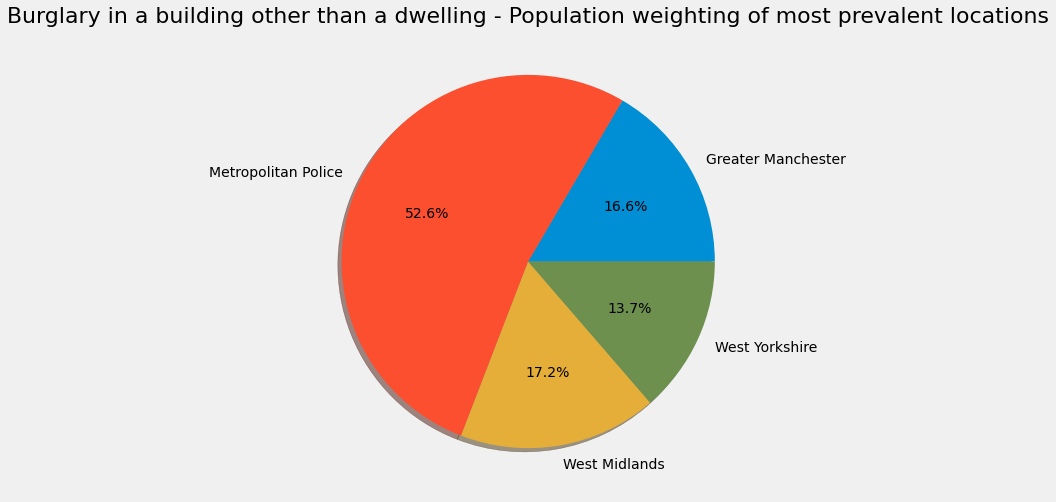

In [27]:
# Plot the population arrray and use percentages. 
plt.pie(population, labels = outliers.index, autopct='%1.1f%%', textprops={'fontsize': 14}, shadow = True)

# Set the title of the plot. 
plt.title('Burglary in a building other than a dwelling - Population weighting of most prevalent locations')

# Show plot.
plt.show()

<br> 

### Plotting the crime weightings per population for the outlier regions. 

Below we can see that West Yorkshire has the highest crime rate for burglary in a building other than a dwelling per population.  London has the lowest rate when population is considered.  

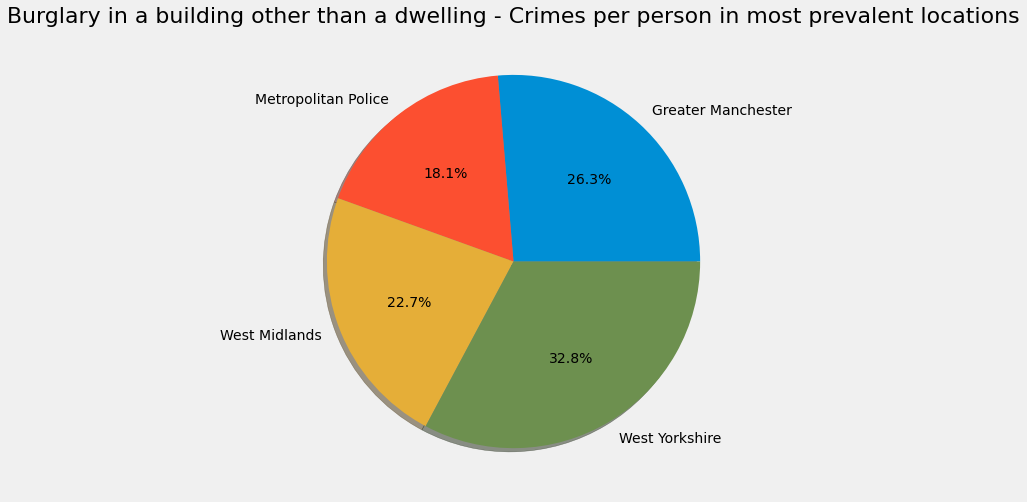

In [28]:
plt.pie(weight, labels = pop.keys(), autopct='%1.1f%%', textprops={'fontsize': 14}, shadow = True)
plt.title('Burglary in a building other than a dwelling - Crimes per person in most prevalent locations')
plt.show()

<br>

### Bar plot of the crime weightings per population for the outlier regions.

The bar chart below plots the same data as the pie plot directly above.  West Yorkshire has the highest rate of burglary in a building other than a dwelling per population. 

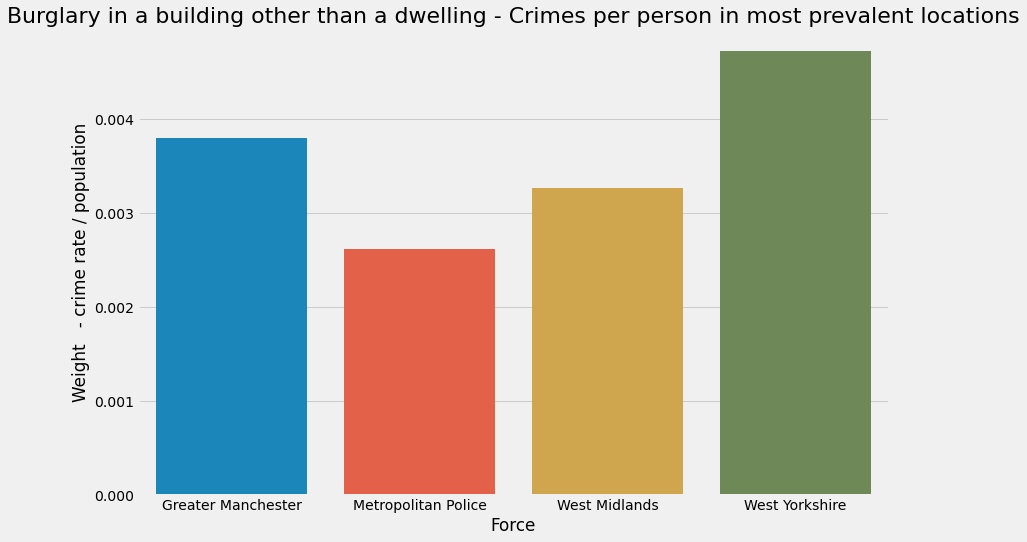

In [31]:
# Seaborn barplot for the crime weights per population of the top crime. Data taken directly from the outliers dataframe. 
sns.barplot(data= outliers, x= outliers.index,  y = "weight")

# Setting the y label. 
plt.ylabel("Weight   - crime rate / population")

# Setting the plot title. 
plt.title("{} - Crimes per person in most prevalent locations".format(top_crime))

# Showing plot. 
plt.show()

In [30]:
# Printing the full original dataframe - with only 2014 - 2015 data.  
pd.set_option("display.max_rows", None, "display.max_columns", None)
df

,Year,Force,Robbery of business property,Robbery of personal property,TOTAL ROBBERY,Burglary in a dwelling,Attempted burglary in a dwelling,Distraction burglary in a dwelling,Attempted distraction burglary in a dwelling,Aggravated burglary in a dwelling,Domestic burglary,Burglary in a building other than a dwelling,Attempted burglary in a building other than a dwelling,Aggravated burglary in a building other than a dwelling,Non-domestic burglary
519,2013/14,Avon and Somerset,67.0,664.0,731.0,3277,685,66,12,40.0,4080.0,5424,710,4.0,6138.0
520,2013/14,Bedfordshire,50.0,586.0,636.0,2260,491,32,1,12.0,2796.0,1992,365,0.0,2357.0
521,2013/14,British Transport Police,0.0,416.0,416.0,0,0,0,0,0.0,0.0,401,41,1.0,443.0
522,2013/14,Cambridgeshire,35.0,345.0,380.0,2083,288,23,1,16.0,2411.0,2663,305,0.0,2968.0
523,2013/14,Cheshire,80.0,232.0,312.0,2340,412,22,1,56.0,2831.0,3689,517,6.0,4212.0
524,2013/14,Cleveland,40.0,228.0,268.0,1577,270,29,5,19.0,1900.0,2238,407,1.0,2646.0
525,2013/14,Cumbria,14.0,53.0,67.0,583,105,6,0,7.0,701.0,1350,250,2.0,1602.0
526,2013/14,Derbyshire,60.0,569.0,629.0,2436,418,40,0,12.0,2906.0,4259,637,1.0,4897.0
527,2013/14,Devon and Cornwall,39.0,323.0,362.0,2675,406,36,0,22.0,3139.0,3873,561,5.0,4439.0
528,2013/14,Dorset,18.0,186.0,204.0,1494,178,29,3,11.0,1715.0,3031,257,1.0,3289.0
